### ***VIABILIDAD DE UN MICROTEATRO EN BILBAO***
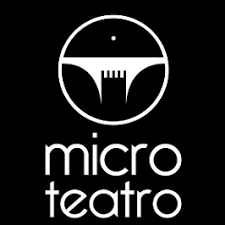

**0. IMPORTACIÓN DE LIBRERÍAS BÁSICAS**

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import json
import warnings
warnings.filterwarnings("ignore")

**VERSIÓN CON PROGRAMACIÓN FUNCIONAL**

**1. CARGA DE DATASET Y PRIMER VISTAZO**

In [2]:
df = pd.read_csv("./data/dataset.csv")

In [3]:
df.head()

,tipo_evento,lugar,capacidad,precio_medio,evento_gratuito,distrito,asistentes,hombres,mujeres,ratio_ocupacion
0,Música,Sala BBK,1237,48.59,0,Casco Viejo,669,316,353,54.082458
1,Poesía,La Fundición,755,13.00,0,San Francisco,507,246,261,67.152318
2,Música,Teatro Arriaga,113,29.74,1,Deusto,62,37,25,54.867257
3,Danza,La Fundición,840,26.40,1,Casco Viejo,528,282,246,62.857143
4,Poesía,Sala BBK,1146,45.95,1,Casco Viejo,883,444,439,77.050611


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 600 entries, 0 to 599
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   tipo_evento      600 non-null    object 
 1   lugar            600 non-null    object 
 2   capacidad        600 non-null    int64  
 3   precio_medio     600 non-null    float64
 4   evento_gratuito  600 non-null    int64  
 5   distrito         600 non-null    object 
 6   asistentes       600 non-null    int64  
 7   hombres          600 non-null    int64  
 8   mujeres          600 non-null    int64  
 9   ratio_ocupacion  600 non-null    float64
dtypes: float64(2), int64(5), object(3)
memory usage: 47.0+ KB


In [5]:
df.describe()

,capacidad,precio_medio,evento_gratuito,asistentes,hombres,mujeres,ratio_ocupacion
count,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000,600.000000
mean,1037.373333,28.207100,0.320000,676.836667,340.598333,336.238333,65.314019
std,538.685555,13.692567,0.466865,384.703511,199.750220,195.437965,14.637349
min,101.000000,5.010000,0.000000,50.000000,25.000000,22.000000,40.044743
25%,562.750000,16.545000,0.000000,357.750000,177.750000,172.500000,52.609731
50%,1013.000000,27.810000,0.000000,670.500000,324.500000,320.500000,64.808916
75%,1492.000000,39.510000,1.000000,934.750000,469.000000,453.250000,78.257556
max,1997.000000,59.280000,1.000000,1694.000000,972.000000,947.000000,89.932886


In [6]:
df.tipo_evento.value_counts()

tipo_evento
Teatro       183
Danza        129
Poesía       123
Música       117
Concierto     32
Musical        9
Monólogo       7
Name: count, dtype: int64

In [7]:
df.evento_gratuito.value_counts()

evento_gratuito
0    408
1    192
Name: count, dtype: int64

In [8]:
df.lugar.value_counts()

lugar
Bilborock                110
La Fundición             105
Sala BBK                 104
Teatro Arriaga            98
Euskalduna                83
Pabellón Número 6         37
Filarmónica de Bilbao     32
Teatro Campos Elíseos     31
Name: count, dtype: int64

In [9]:
df.distrito.value_counts()

distrito
San Francisco    127
Casco Viejo      119
Deusto           118
Abando           118
Indautxu         118
Name: count, dtype: int64

**2. DEFINICIÓN DEL TARGET Y SPLIT**

In [10]:
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score

# Definir la variable objetivo (target)
target = "asistentes"

In [11]:
# Dividir los datos en entrenamiento (80%) y prueba (20%)
train_set, test_set = train_test_split(df, test_size=0.2, random_state=42)

In [12]:
df.asistentes

0      669
1      507
2       62
3      528
4      883
      ... 
595    674
596    869
597    787
598    116
599    716
Name: asistentes, Length: 600, dtype: int64

**3. MINIEDA**

<Axes: xlabel='asistentes', ylabel='Count'>

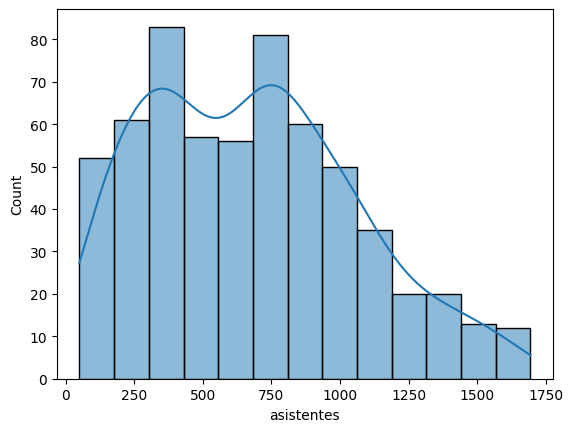

In [13]:
# Disribución del target
import seaborn as sns

sns.histplot(x = target, data = df, kde = True)

In [14]:
cols_num = ['capacidad', 'precio_medio', 'asistentes', 'hombres', 'mujeres', 'ratio_ocupacion']
cols_cat = ['tipo_evento', 'lugar', 'distrito', 'evento_gratuito']

>**3.1 ANÁLISIS DE VARIABLES NUMÉRICAS**

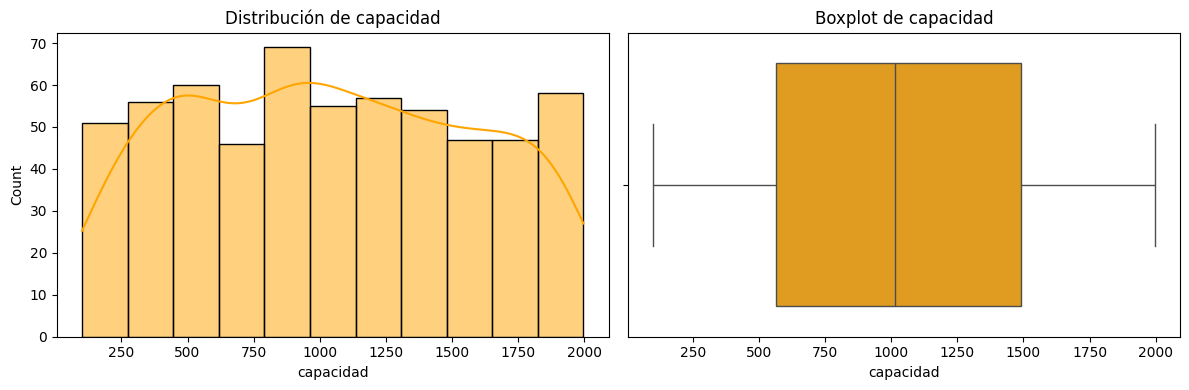

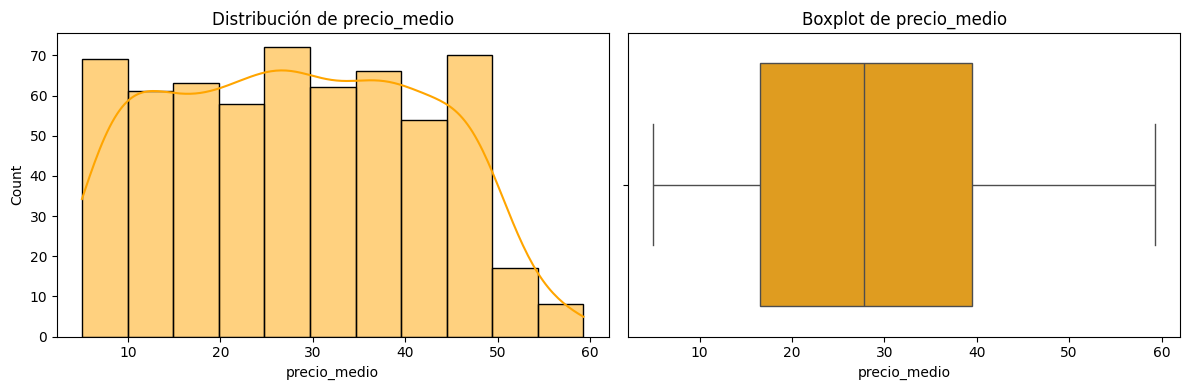

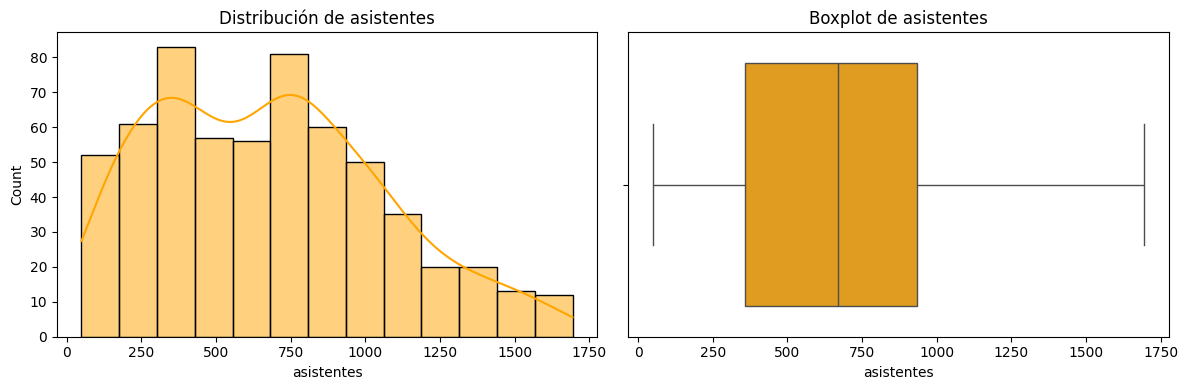

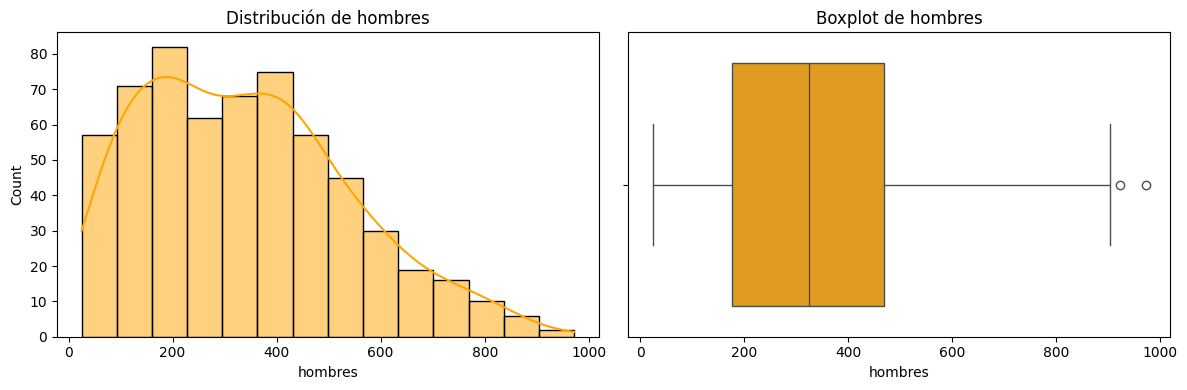

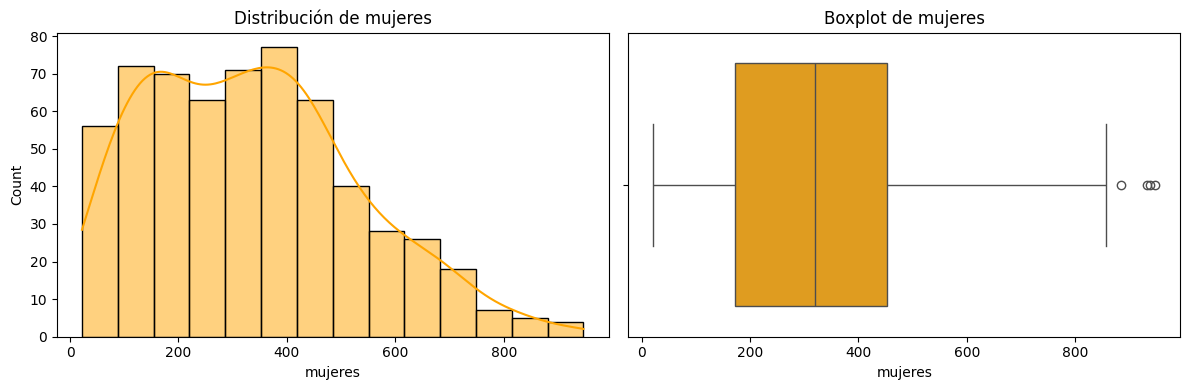

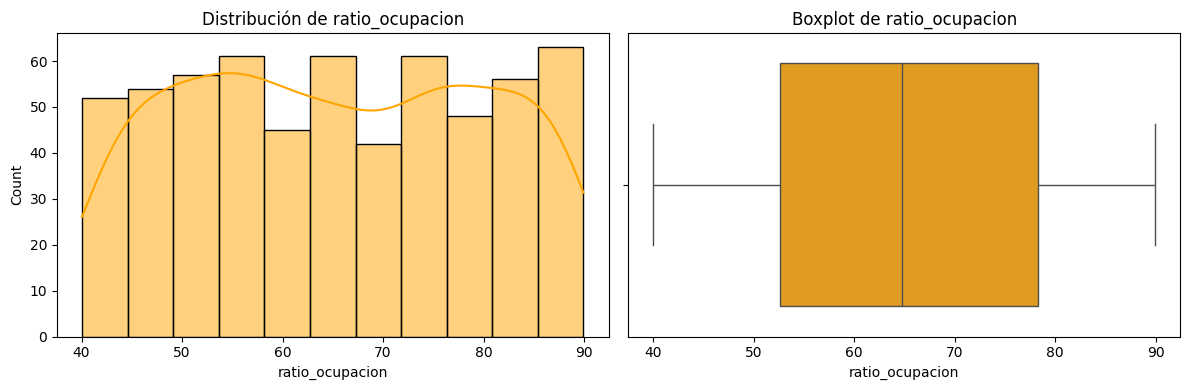

In [15]:
for col in cols_num:
    fig, axes = plt.subplots(1, 2, figsize=(12, 4))
    sns.histplot(df[col], kde=True, ax=axes[0], color="orange")
    axes[0].set_title(f"Distribución de {col}")
    sns.boxplot(x=df[col], ax=axes[1], color="orange")
    axes[1].set_title(f"Boxplot de {col}")
    plt.tight_layout()
    plt.show()

In [16]:
corr = train_set.corr(numeric_only=True)
corr

,capacidad,precio_medio,evento_gratuito,asistentes,hombres,mujeres,ratio_ocupacion
capacidad,1.000000,0.010544,-0.010359,0.900597,0.876316,0.875968,0.045270
precio_medio,0.010544,1.000000,-0.062928,0.005547,-0.000017,0.010867,0.004699
evento_gratuito,-0.010359,-0.062928,1.000000,-0.018366,-0.013496,-0.022285,-0.048696
asistentes,0.900597,0.005547,-0.018366,1.000000,0.973136,0.972555,0.426720
hombres,0.876316,-0.000017,-0.013496,0.973136,1.000000,0.892858,0.415238
mujeres,0.875968,0.010867,-0.022285,0.972555,0.892858,1.000000,0.415026
ratio_ocupacion,0.045270,0.004699,-0.048696,0.426720,0.415238,0.415026,1.000000


In [17]:
import numpy as np
np.abs(corr[target]).sort_values(ascending = False)

asistentes         1.000000
hombres            0.973136
mujeres            0.972555
capacidad          0.900597
ratio_ocupacion    0.426720
evento_gratuito    0.018366
precio_medio       0.005547
Name: asistentes, dtype: float64

Las columnas "hombres" y "mujeres" , están descartadas, dado que si se incluyesen sería prácticamente como incluir el target en el entrenamiento del modelo, no tiene ningún sentido (y de ahí que correlen tanto con el target).
La columna "Evento_gratuito" es una columna categórica, con lo cual, para las numéricas, está descartada y el "precio_medio" tiene una correlación muy baja.
En vista de eso, me quedaría únicamente con "capacidad" y con "ratio_ocupacion"

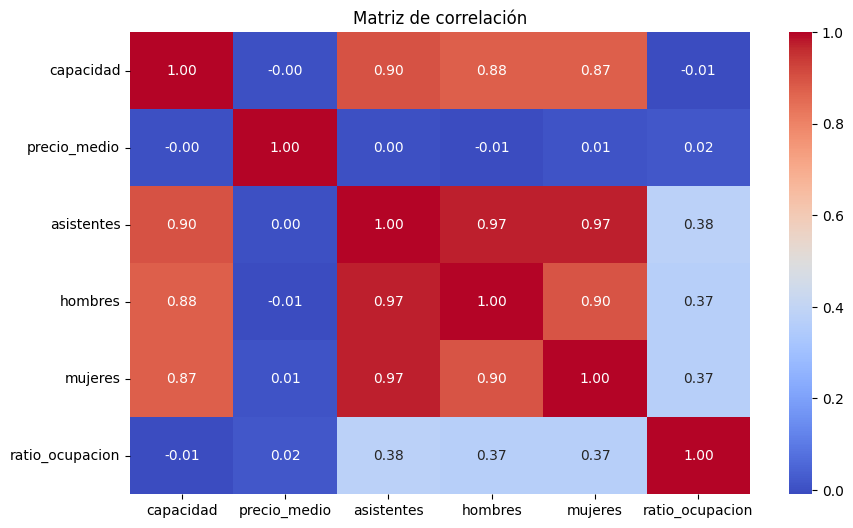

In [18]:
plt.figure(figsize=(10, 6))
sns.heatmap(df[cols_num].corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Matriz de correlación")
plt.show()

Nos quedamos con las variables definitivas: capacidad y ratio_ocupacion

In [19]:
features_num_def = ["capacidad", "ratio_ocupacion"]
features_num_def

['capacidad', 'ratio_ocupacion']

<Axes: >

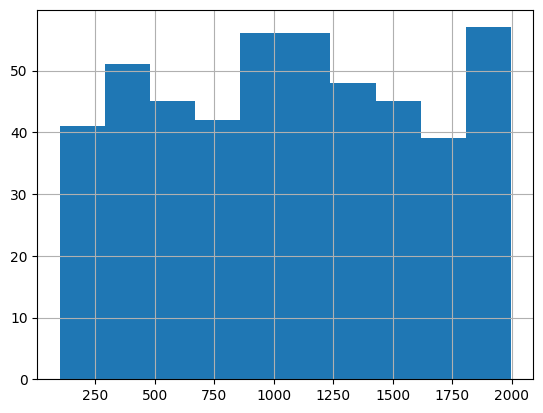

In [20]:
train_set.capacidad.hist()

<Axes: >

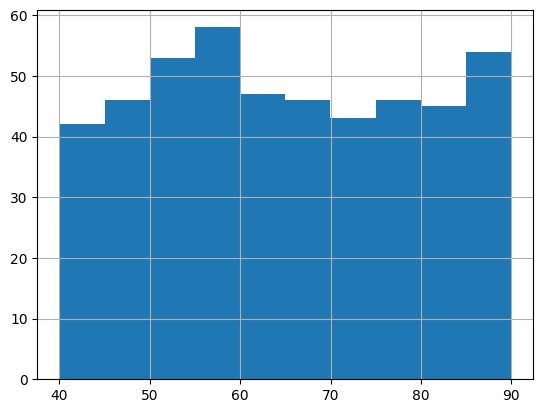

In [21]:
train_set.ratio_ocupacion.hist()

No veo observo que tengan una distribución de larga cola, con lo cual no veo necesario aplicarles el logaritmo.

>**3.2 ANÁLISIS VARIABLES CATEGÓRICAS**

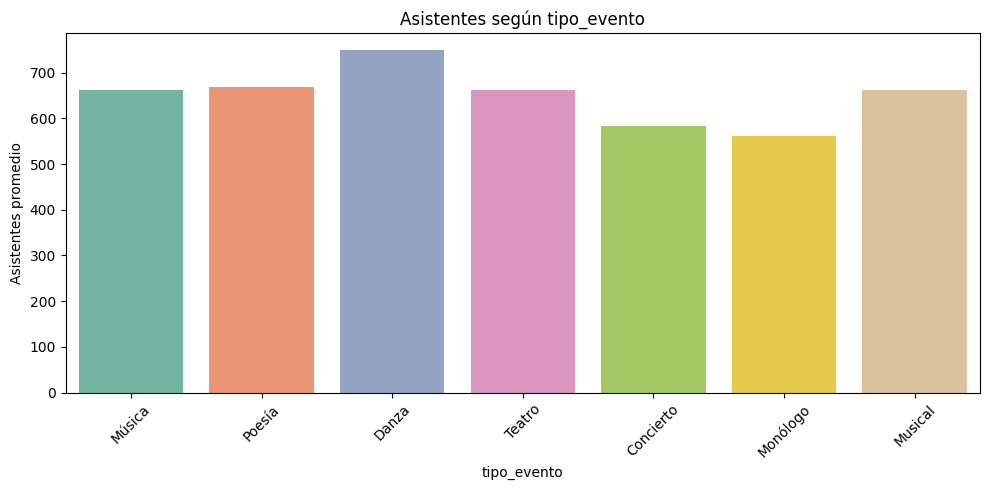

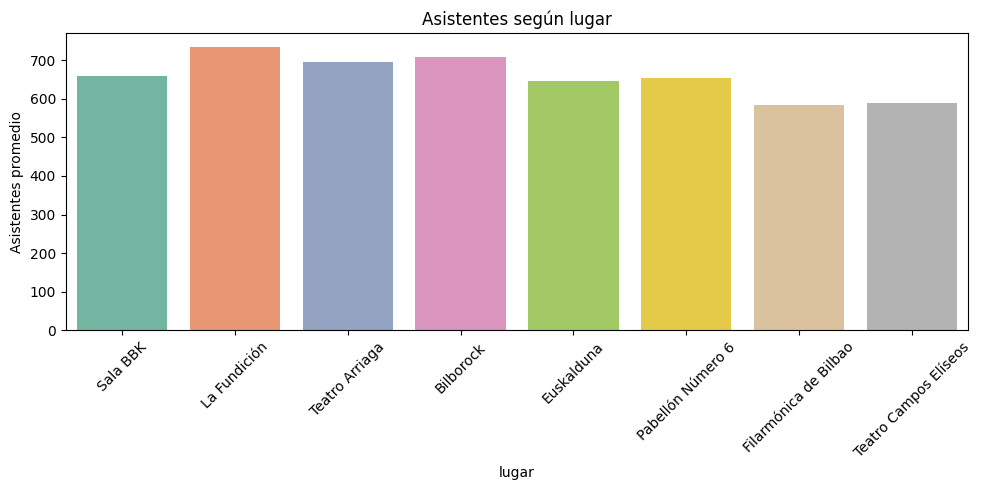

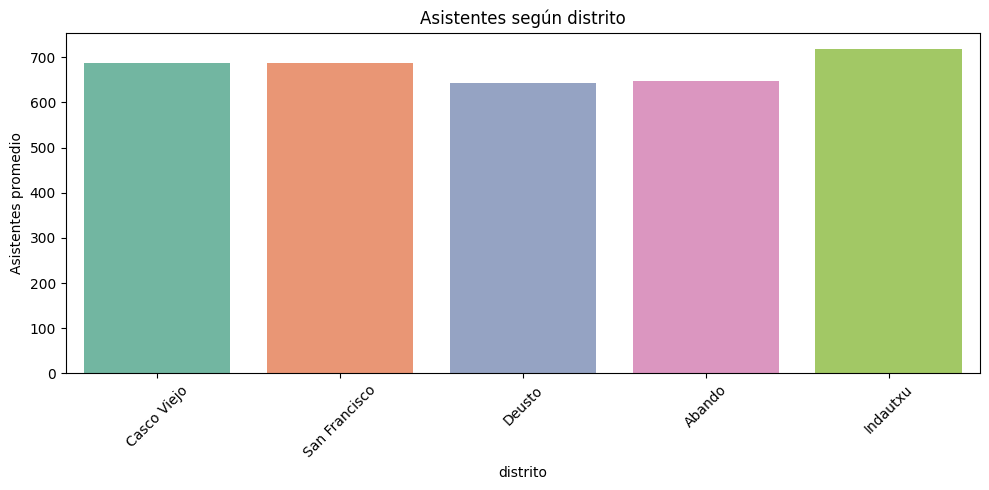

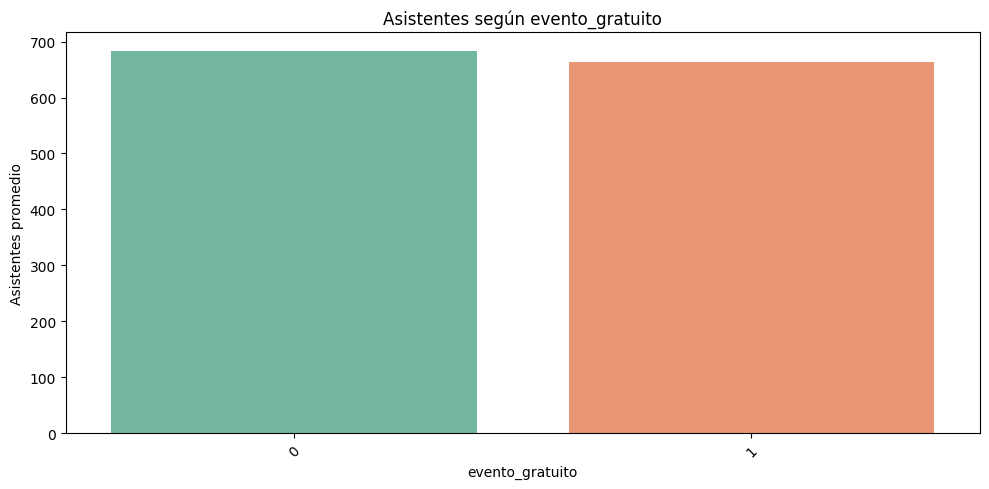

In [22]:
for col in cols_cat:
    plt.figure(figsize=(10, 5))
    sns.barplot(x=col, y="asistentes", data=df, estimator="mean", ci=None, palette="Set2")
    plt.xticks(rotation=45)
    plt.title(f"Asistentes según {col}")
    plt.ylabel("Asistentes promedio")
    plt.xlabel(col)
    plt.tight_layout()
    plt.show()

In [23]:
features_cat = train_set.select_dtypes(include="object").columns.tolist()

features_cat.append("evento_gratuito")


features_cat

['tipo_evento', 'lugar', 'distrito', 'evento_gratuito']

In [24]:
features_cat_def= ["tipo_evento", "lugar", "distrito"]
features_cat_def

['tipo_evento', 'lugar', 'distrito']

**4. PROCESADO DE VARIABLES**

In [25]:
#Procesamos las categóricas:

train_set = pd.get_dummies(train_set, columns = features_cat_def, dtype=int)
test_set = pd.get_dummies(test_set, columns= features_cat_def, dtype=int)

In [26]:
features_cat_def_dummies = [col for col in train_set.columns if col.startswith("tipo_evento_") or col.startswith("lugar_") or col.startswith("distrito_")]

In [27]:
train_set.shape

(480, 27)

In [28]:
test_set.shape

(120, 27)

In [29]:
#Procesamos las numéricas:

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

train_set[features_num_def] = scaler.fit_transform(train_set[features_num_def])
test_set[features_num_def] = scaler.transform(test_set[features_num_def])

In [30]:
X_train =  train_set[features_num_def + features_cat_def_dummies]
y_train = train_set[target]

X_test =  test_set[features_num_def + features_cat_def_dummies]
y_test = test_set[target]

In [31]:
# Asegura que las columnas estén alineadas
X_test = X_test.reindex(columns=X_train.columns, fill_value=0)


**5. ENTRENAMIENTO DEL MODELO BASE Y VALIDACIÓN CRUZADA**

In [32]:
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRFRegressor
from lightgbm import LGBMRegressor

base_clf = RandomForestRegressor(max_depth = 5, random_state = 42)


In [33]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Validación cruzada con MAE
mae_scores = cross_val_score(base_clf, X_train, y_train, cv=5, scoring="neg_mean_absolute_error")
print("MAE medio:", -np.mean(mae_scores))  # Lo negamos para que sea positivo

# Validación cruzada con R2
r2_scores = cross_val_score(base_clf, X_train, y_train, cv=5, scoring="r2")
print("R2 medio:", np.mean(r2_scores))

MAE medio: 30.93278046318566
R2 medio: 0.988472414456691


In [34]:
base_clf.fit(X_train, y_train)

RandomForestRegressor(max_depth=5, random_state=42)

In [35]:
xgb_clf = XGBRFRegressor(max_depth = 5, random_state = 42)
lgb_clf = LGBMRegressor(max_depth= 5, verbose = -100)

for nombre, modelo in zip(["Random Forest", "XGBoost","LightGBM"], [base_clf, xgb_clf, lgb_clf]):

    mae =-np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "neg_mean_absolute_error"))
    r2 = np.mean(cross_val_score(modelo, X_train, y_train, cv = 5, scoring = "r2"))

    print(f"{nombre} -> MAE:{mae:.2f} | R^2: {r2:.3f}")


Random Forest -> MAE:30.93 | R^2: 0.988
XGBoost -> MAE:36.49 | R^2: 0.984
LightGBM -> MAE:20.10 | R^2: 0.995


**6. OPTIMIZACIÓN DE LOS 3 MODELOS EMPLEADOS**

In [36]:
rf_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [None, 5, 10],
    "min_samples_split": [2, 5, 7]
}

# XGBoost
xgb_grid = {
    "n_estimators": [100, 200, 300 ],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.01, 0.1]
}

# LightGBM
lgb_grid = {
    "n_estimators": [100, 200, 300],
    "max_depth": [3, 5, 7],
    "learning_rate": [0.05, 0.01, 0.1],
    "num_leaves": [15, 31, 45]
}

In [37]:
# Random Forest
rf_search = GridSearchCV(base_clf, rf_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
rf_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=RandomForestRegressor(max_depth=5, random_state=42),
             n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_split': [2, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [38]:
# XGBoost
xgb_search = GridSearchCV(xgb_clf, xgb_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
xgb_search.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=XGBRFRegressor(base_score=None, booster=None,
                                      callbacks=None, colsample_bylevel=None,
                                      colsample_bytree=None, device=None,
                                      early_stopping_rounds=None,
                                      enable_categorical=False,
                                      eval_metric=None, feature_types=None,
                                      feature_weights=None, gamma=None,
                                      grow_policy=None, importance_type=None,
                                      interaction_constraints=None,
                                      max_bin=None, max_ca...
                                      max_delta_step=None, max_depth=5,
                                      max_leaves=None, min_child_weight=None,
                                      missing=nan, monotone_constraints=None,
                                      multi_strategy=None, n_estimators=None,
                                      n_jobs=None, num_parallel_tree=None,
                                      objective='reg:squarederror',
                                      random_state=42, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_absolute_error')

In [39]:
# LightGBM
lgb_search = GridSearchCV(lgb_clf, lgb_grid, cv=5, scoring="neg_mean_absolute_error", n_jobs=-1)
lgb_search.fit(X_train, y_train)


GridSearchCV(cv=5, estimator=LGBMRegressor(max_depth=5, verbose=-100),
             n_jobs=-1,
             param_grid={'learning_rate': [0.05, 0.01, 0.1],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300],
                         'num_leaves': [15, 31, 45]},
             scoring='neg_mean_absolute_error')

In [40]:
print("Random Forest → Best MAE:", -rf_search.best_score_)
print("Best Params:", rf_search.best_params_)

print("\nXGBoost → Best MAE:", -xgb_search.best_score_)
print("Best Params:", xgb_search.best_params_)

print("\nLightGBM → Best MAE:", -lgb_search.best_score_)
print("Best Params:", lgb_search.best_params_)


Random Forest → Best MAE: 20.76285848091868
Best Params: {'max_depth': 10, 'min_samples_split': 2, 'n_estimators': 300}

XGBoost → Best MAE: 294.34576416015625
Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}

LightGBM → Best MAE: 18.181439943819733
Best Params: {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300, 'num_leaves': 15}


El mejor modelo es, sin duda el Random Forest con un MAE de 137.39, mientras que XGBoost ha dado muy malos resultados, prácticamente más del doble de MAE que los otros dos modelos. 

**7. ENTRENAMIENTO FINAL CON RANDOMFORESTREGRESSOR OPTIMIZADO**

In [41]:
final_model = RandomForestRegressor(
    max_depth=10,
    min_samples_split=2,
    n_estimators=300,
    random_state=42
)
final_model.fit(X_train, y_train)

RandomForestRegressor(max_depth=10, n_estimators=300, random_state=42)

**8. PREDICCIÓN SOBRE TEST Y EVALUACIÓN**

In [42]:
y_pred = final_model.predict(X_test)

In [43]:
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("MAE:", mae)
print("R2:", r2)
print("RMSE:", rmse)

MAE: 16.01894873105744
R2: 0.9961903573894534
RMSE: 20.86595998288476


In [ ]:
import pickle
import os

model_filename = "src/models/final_model.pkl"

os.makedirs(os.path.dirname(model_filename), exist_ok=True)

with open(model_filename, "wb") as f:
    pickle.dump(final_model, f)

print(f"Modelo guardado en {model_filename}")


Modelo guardado en src/models/final_model.pkl


**9. COMPROBACIÓN DE OVERFITTING**

A pesar de que NO hay que entrenar el modelo con y_train, en este caso lo he hecho al final para comprobar si podría o no haber overfitting, comparando las métricas.

In [ ]:
y_train_pred = final_model.predict(X_train)

# Rendimiento del modelo en entrenamiento
mae_train = mean_absolute_error(y_train, y_train_pred)
r2_train = r2_score(y_train, y_train_pred)

print(f"MAE en entrenamiento: {mae_train:.2f}")
print(f"R² en entrenamiento: {r2_train:.3f}")

MAE en entrenamiento: 6.92
R² en entrenamiento: 0.999


El R² en ambos conjuntos es muy alto (0.996–0.999), lo cual implica que el modelo explica casi toda la varianza en ambos.

La diferencia de MAE (6.9 vs 16.1) no es descabellada, considerando que se ha trabajado con variables reales, donde vierta variabilidad es habitual. 

La conclusión, por tanto, es que no hay overfitting.